# Analyze data frequency peak using periodogram

## What is a periodogram

A periodogram is a plot of power spectral density of a signal. 

## Import modules

In [1]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
%matplotlib inline

## Load and visualize data

We load hourly discharge data into a [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) from a csv file using the [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) method.

The first column of the file is a timestamp, the second is the streamflow discharge in cubic meter per seconds. Example:

    Timestamp, Discharge [cms]
    1968-12-31 23:00:00,2.618941396073
    1969-01-01 00:00:00,2.618941396073
    1969-01-01 01:00:00,2.618941396073
    1969-01-01 02:00:00,2.618941396073
    ...

The dataframe holds 175321 records.

In [2]:
df = pd.read_csv('data/discharge.csv', index_col = 0, parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175321 entries, 1968-12-31 23:00:00 to 1988-12-31 23:00:00
Data columns (total 1 columns):
 Discharge [cms]    175321 non-null float64
dtypes: float64(1)
memory usage: 2.7 MB


In [3]:
discharge=df[df.columns[0]]
discharge.describe()

count    175321.000000
mean          4.288649
std           4.723853
min           0.150000
25%           1.227224
50%           2.793163
75%           5.587714
max          71.235717
Name:  Discharge [cms], dtype: float64

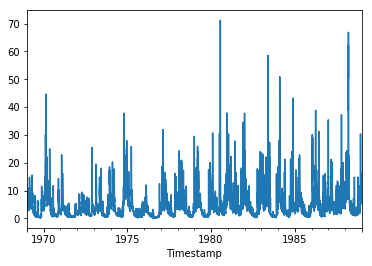

In [4]:
discharge.plot()

## Periodogram using numpy

1. We can use [np.fft.fft](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.fft.fft.html#numpy.fft.fft) routine to perform the Fast Fourier Transform $F$ of the signal
2. We can compute the Power Spectral Density using $|F|^2$
3. We can use [np.fft.fftfreq](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html) to return the FFT sampled frequencies 

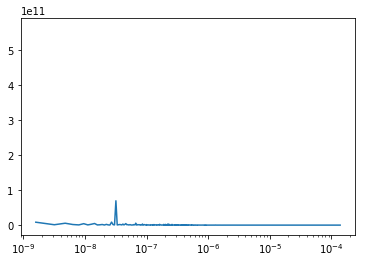

In [5]:
# compute power spectrum
ps = np.abs(np.fft.fft(discharge))**2
# define time step
time_step = 60*60 # 1 hour is 60 * 60 sec
# retrieve sampled frequencies
freqs = np.fft.fftfreq(discharge.values.size, time_step)
# get index of sorted frequencies in ascending order
idx = np.argsort(freqs)
# perform the plot
plt.semilogx(freqs[idx], ps[idx])

## Periodogram using scipy

The scipy module has a dedicated method [scipy.signal.periodogram](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.periodogram.html) to compute the periodogram.

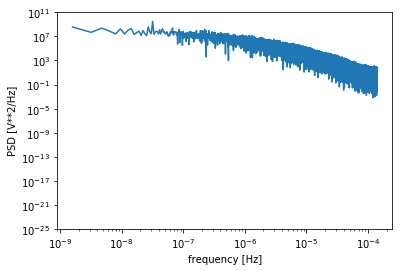

In [6]:
freq = 1./(60*60)
f, Pxx_den = signal.periodogram(discharge.values, freq)
plt.loglog(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

## Periodogram using the Welch method

Welch’s method computes an estimate of the power spectral density by dividing the data into overlapping segments, computing a modified periodogram for each segment and averaging the periodograms. The number of data per segment is specified using the `nperseg` argument.

This method might show some improvement, especially with respect to noise immunity. However, it may hide some low frequency cycles.

It is implemented by the [scipy.signal.welch](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.welch.html#scipy.signal.welch) method.

The example below stacks 4 segments of the discharge data to compute the periodogram.

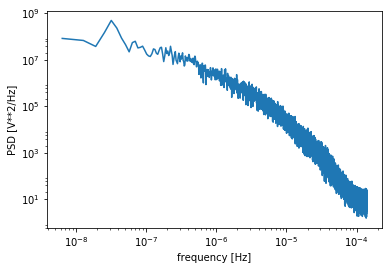

In [7]:
f, Pxx_den = signal.welch(discharge, freq, nperseg=len(discharge)/4)
plt.loglog(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')